# **Titanic - Machine Learning From Disaster**
In this notebook, we're going to analyse the famous Titanic dataset from Kaggle. we're going to import & do some exploratory analysis on the given dataset. After that we'll build the supervised machine larning model using Logistic Regression.
We'll try to answer the following questions:



* Who were the passengers on the Titanic? (age, gender, class.. etc)
* What deck were the passengers on and how does that relate to their class?
* Where did the passengers come from?
* Who was alone and who was with family?
* What factors helped someone survive the sinking?
* How accurately we can predict the survival of the passenger?



##**1) Importing the required Python Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("All the required libraries has been imported successfully !!!")


All the required libraries has been imported successfully !!!


##**2) Loading the Training & Test Datasets**

In [ ]:
# Load the training data from csv file to Pandas DataFrame
train_data = pd.read_csv('/content/drive/MyDrive/ML,DS_Project_Datasets/Titanic_Dataset/train.csv')

# know the number of rows and columns in the training data
train_data.shape

(891, 12)

## **3) Exploratory Data Analysis**

In [ ]:
#Looking at the first few rows in the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# More information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above, we see that the dataset is missing a lot of information in the **Cabin** column. Hence, We'll delete the cabin column from the data.

Other information seems to be complete, except some **Age** entries.

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**describe** method quickly gives us some aggregate stats for the dataset.

1 in the **Survived** column means that the person survived, while a 0 mean that they died. So looking at the mean, we can say that only ~38% people survived the sinking.

##Who were the passengers on the Titanic?

Let's look at some demographical information about the passengers.

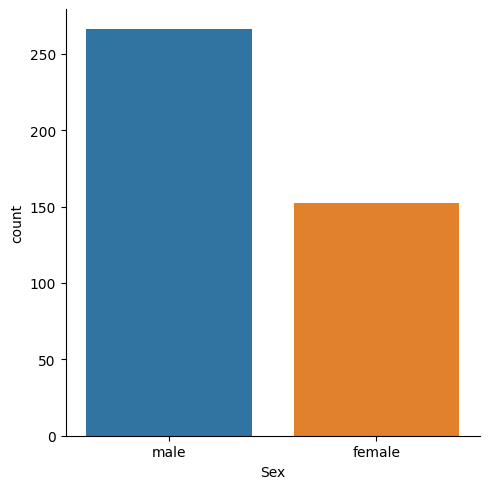

In [ ]:
# creating a factorplot, charting the number of male and female passengers
sns.catplot(x='Sex',data=test_data,kind='count')


Unsurprisingly, there were considerably more male passengers onboard.

Let's take a look at how the passengers were divided among different classes.

Note: The **Pclass** attribute is a proxy for the socio-economic class of a person.

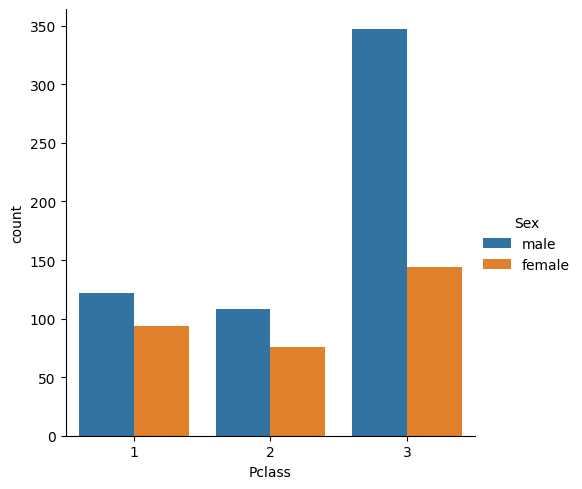

In [ ]:
sns.catplot(x='Pclass',data=train_data,hue='Sex',kind='count')

Another thing we can do before we start infering something from the above factorplot, is to divide the passengers between male, female, and a child.

In [ ]:
#Function to detect if a person is a male, female or child.
def male_female_child(passanger):
  age=passanger['Age']
  sex=passanger['Sex']

  return 'child' if age < 16 else sex

#Using Pandas' apply method to create a new column "Person"
train_data['Person'] = train_data.apply(male_female_child,axis=1)

In [ ]:
#Looking at the first 10 rows in the dataset, to see if our method worked.
train_data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [ ]:
#Getting the actual counts
print(train_data['Person'].value_counts())


male      537
female    271
child      83
Name: Person, dtype: int64


Now, let's create a factorplot to check out the distribution of men, women and children belonging to different classes.

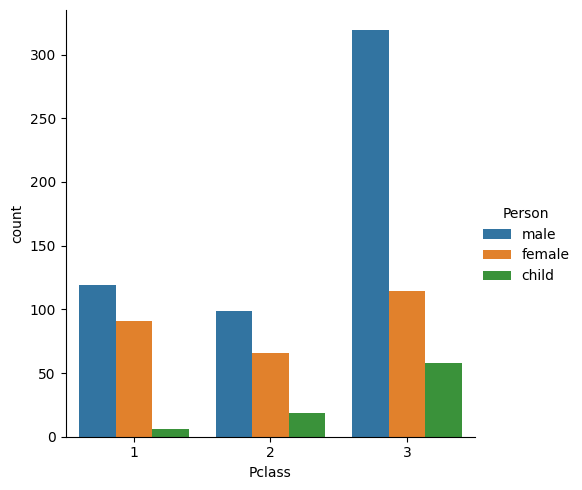

In [ ]:
sns.catplot(x='Pclass',data=train_data,hue='Person',kind='count')

What's interesting to note above, is that there are way more male passengers than woman or childeren, in the 3rd class, than any other class. This will lead to an interesting analysis later on.

We can quickly create a histogram from the dataset, to check out the distribution of passengers of different age groups.

<Axes: >

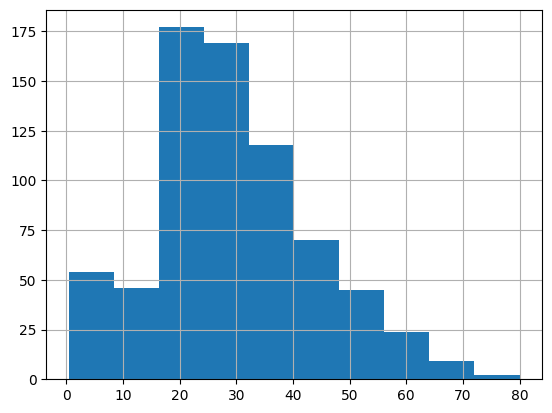

In [ ]:
train_data['Age'].hist()

Let's check out how the age distribution varies for different classes. We'll use Seaborn's **Facetgrid** for this purpose.

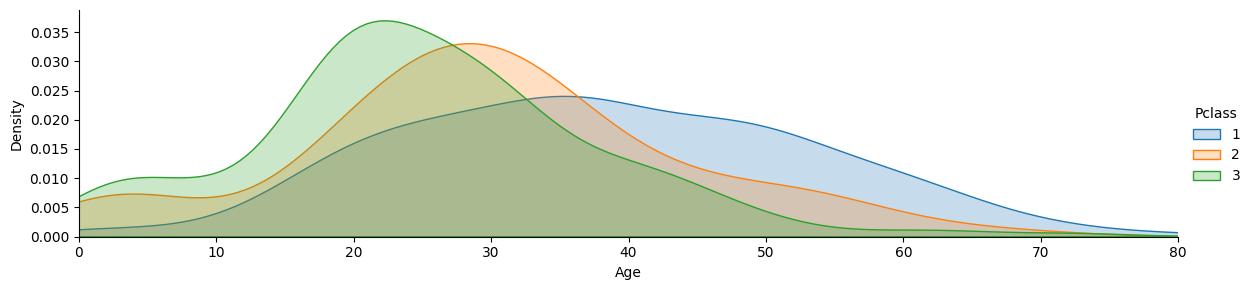

In [ ]:
fig = sns.FacetGrid(train_data,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',fill=True)

oldest = train_data['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Quite clearly, we can see that the first class passengers belonged more to the middle age groups, with very few children.

Second and third class had more children, with relatively fewer older people.

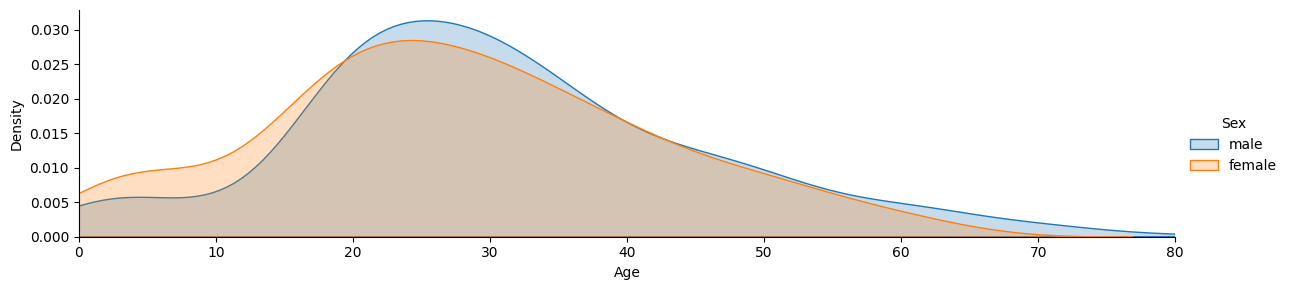

In [ ]:
fig = sns.FacetGrid(train_data,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',fill=True)

oldest = train_data['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

The age distribution seems to be less varied in terms of male and female passengers, though we can say that there more younger females than younger males.

##Where did the passengers come from?
The **Embarked** attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

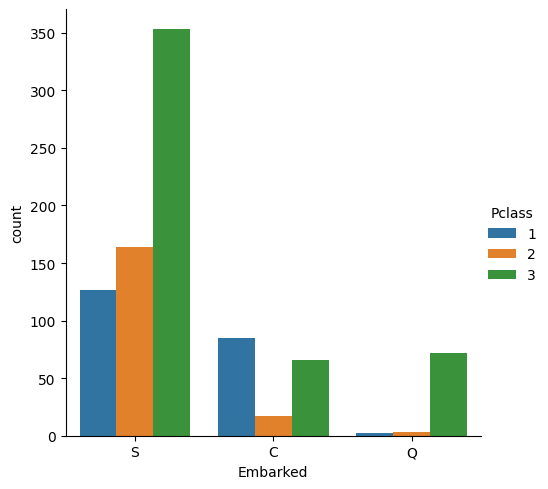

In [ ]:
sns.catplot(x='Embarked',data=train_data,hue='Pclass',kind='count')

Most of the passengers embarked from Southampton (including Jack and Rose, in the movie). What's also interesting, is that almost no first or second class passengers embarked from Queenstown, which can tell us something about the socio-economic status of the population of Queenstown.

##Who was with their family?
Let's take another look at our data:

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


The **SibsSP** attribute refers to the number of siblings or spouses that a passenger had aboard. **Parch** refers to the number of parents or children someone had on the ship.

As we're just trying to know if a passenger had *someone* from his family onboard, we can make our life a bit easier by making another column to represent this data.

In [ ]:
#Check who are alone & who are along with the family
train_data['Alone']=train_data.SibSp+train_data.Parch

In [ ]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male,0


Anything above the other than 0 in the new **Alone** column means that the person wasn't alone. So we're going to use that column to define our 'Alone' stats more clearly.

In [ ]:
train_data['Alone'].loc[train_data['Alone']>0]='No'

train_data['Alone'].loc[train_data['Alone']==0]='Yes'


<ipython-input-20-3bcd95a28fbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Alone'].loc[train_data['Alone']>0]='No'


In [ ]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male,Yes
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male,Yes
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male,Yes


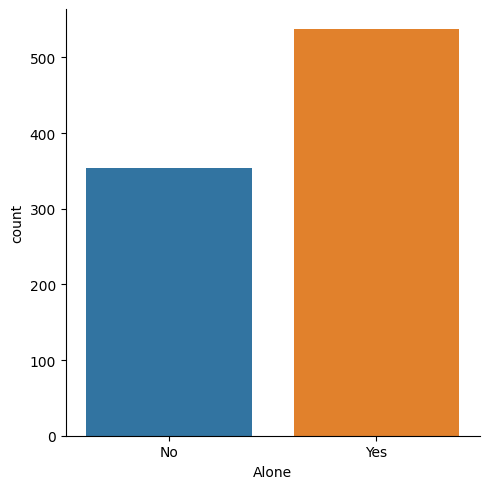

In [ ]:
sns.catplot(x='Alone',data=train_data,kind='count')

The information is pretty simple to digest now. *The majority of people on the ship had family on the ship.* But did that make a difference in their chances of survival? We'll answer the question in the next section.




##What factors helped someone survive the sinking?

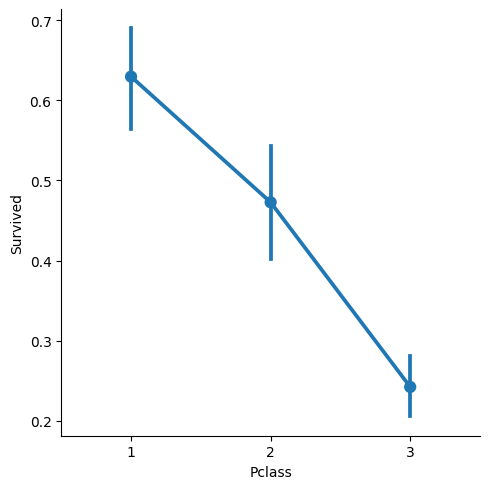

In [ ]:
sns.catplot(x='Pclass',y='Survived',data=train_data,kind='point')

Not to much surprise, it seems like lower class passengers had a lower chance of survival.

But wait, we saw earlier that there were more men than woman or children, in the 3rd class than in any other class. From the movie 'Titanic', you might remember the 'Women and children first!' protocol that the ship's administration followed while putting passengers on the lifeboats

Let's see if this is really the case, by using the 'Person' column as the hue in the factorplot.

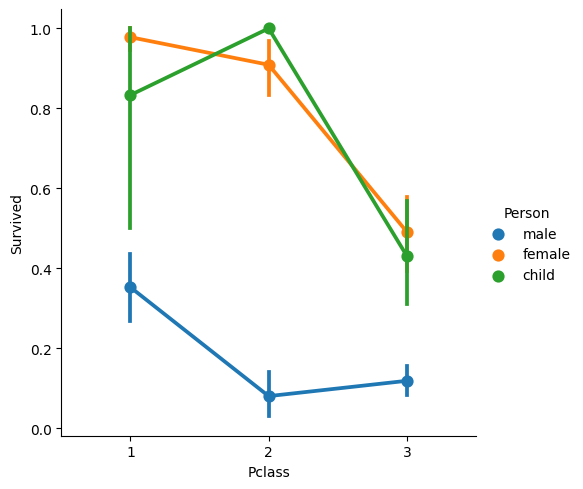

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Person',data=train_data,kind='point')

And this confirms our suspicion. Men had lower chances of survival than women and children, as they had lower priority of being saved.

We can still generally say that men, women and children belonging to the 3rd class had a lesser chance at survival than their counterparts belonging to the 1st class.

Let's see if there's a relation between the age and survival.

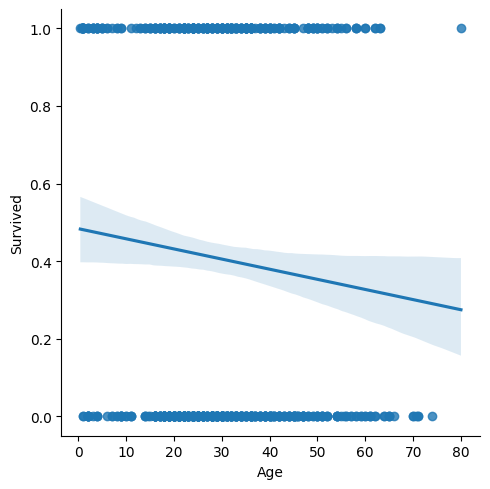

In [ ]:
sns.lmplot(x='Age',y='Survived',data=train_data)

From the above figure it seems to be that, older people were less likely to survive.

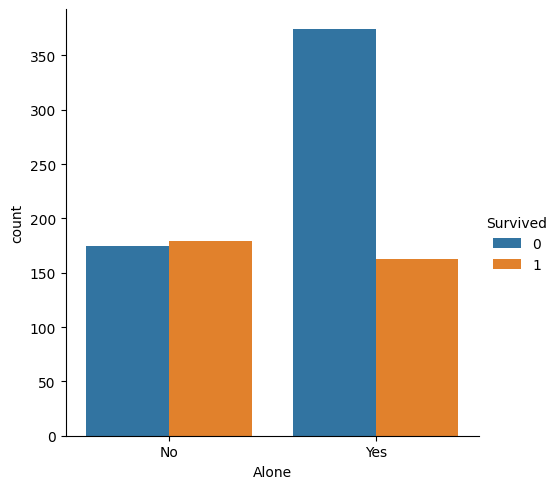

In [ ]:
sns.catplot(x='Alone',hue='Survived',data=train_data,kind='count')

 if you knew someone on the ship, you had a higher chance of survival, than if you were all alone. Company's always good.

## **4) Building Machine Learning Model**

I am using Logistic regression which is a supervised machine learning algorithm mainly used for classification tasks.

It predicts the categorical dependent variable using a given set of independent variables.

In our case dependent variable is **Survived** and independent variables are remaining variables which are impacting on the survival probability of passangers.

## One Hot Encoding
Machine Learning models do not work with categorical data and to fit this data into the machine learning model We'll convert categorical variables as numerical values.

In [ ]:
train_data.replace({'Person':{'male':0,'female':1,'child':2},'Embarked':{'S':0,'C':1,'Q':2},'Alone':{'Yes':1,'No':0}},inplace=True)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,0,1


## Seprating dependent(X) and independent(Y) variables

We will create a new dateframe with feature columns(X)(dependent variables) which will be use to create a model. For which, we will drop the unwanted columns.

In [59]:
X = train_data.drop(columns=['Survived','PassengerId','Name','Sex','Ticket','Fare','Cabin'],axis=1)
Y = train_data['Survived']

In [60]:
# see the Features(X)
X.head()

,Pclass,Age,SibSp,Parch,Embarked,Person,Alone
0,3,22.0,1,0,0.0,0,0
1,1,38.0,1,0,1.0,1,0
2,3,26.0,0,0,0.0,1,1
3,1,35.0,1,0,0.0,1,0
4,3,35.0,0,0,0.0,0,1


Check for the null values in the features

In [61]:
X.isnull().sum()

Pclass        0
Age         177
SibSp         0
Parch         0
Embarked      2
Person        0
Alone         0
dtype: int64

There are few missing values in the feature parameter 'Age' and 'Embarked' which needs to be cleaned.

We'll replace the null values from **Age** with the average age of the passangers

We'll replace the null values from **Embarked** with it's mode value.



In [62]:
X['Age'].fillna(X['Age'].mean(),inplace=True)

X['Embarked'].fillna(X['Embarked'].mean(),inplace=True)

X.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Embarked    0
Person      0
Alone       0
dtype: int64

All the null values has been fixed & now we can proceed for building our model.

Now we will split the feature data into two parts, training and validation. We will train our model on this train data & validate the results on the validation data.

In [63]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size=0.2,random_state=2)

In [64]:
print(X.shape,X_train.shape, X_valid.shape)

(891, 7) (712, 7) (179, 7)


In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train,Y_train)

LogisticRegression()

In [69]:
X_train_prediction = model.predict(X_train)

Let's calculate the **accuracy score** which represents a percentage of correct predictions made by our model.

In [70]:
X_train_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data: ',X_train_accuracy)

Accuracy score of training data:  0.8286516853932584


Our model is predicting the survival of passangers with 83% accuracy on the training data.

Now we will re-check this with the validation data.

In [71]:
X_valid_prediction = model.predict(X_valid)

In [72]:
X_valid_accuracy = accuracy_score(Y_valid,X_valid_prediction)
print('Accuracy score of validation data:',X_valid_accuracy)

Accuracy score of validation data: 0.7821229050279329


On validation data model is performing well, hence we can go ahead and test the model on the unseen test data where ground truth about the passangers i.e. they survived or not is not provided.

# **5) Testing Model On Unseen Data**
One of the critical pillars of validating a learning model before putting them in production is making accurate predictions on unseen data.

The unseen data is all types of data that a model has never learned before.

In [ ]:
# Load the test data from csv file to Pandas DataFrame
test_data = pd.read_csv('/content/drive/MyDrive/ML,DS_Project_Datasets/Titanic_Dataset/test.csv')

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see that, there are similar attributes available in the test data, only diffrence is **Survived** column is missing. We need to predict the values of survival by using our model.

First, I will follow the data cleaning & processing the steps on this test data to load it into our model.

In [80]:
# Adding the 'Person' column
# male_female_child was already defined above whiich is reuse here

test_data['Person'] = test_data.apply(male_female_child,axis=1)

test_data.shape

(418, 13)

In [81]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,male,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,female,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,male,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,male,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,female,0


In [48]:
# Adding the 'Alone' Column
test_data['Alone'] = test_data.SibSp+test_data.Parch

test_data['Alone'].loc[test_data['Alone']>0]='No'
test_data['Alone'].loc[test_data['Alone']==0]='Yes'

test_data.tail()

<ipython-input-48-bbc9af0045ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Alone'].loc[test_data['Alone']>0]='No'


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,male,Yes
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,female,Yes
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,male,Yes
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,male,Yes
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,male,No


In [49]:
# Perform the one hot encoding on the test data
test_data.replace({'Person':{'male':0,'female':1,'child':2},'Embarked':{'S':0,'C':1,'Q':2},'Alone':{'Yes':1,'No':0}},inplace=True)

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,1,0


In [50]:
# Firstly we will drop the unwanted columns,
# After that, remaing columns we will be Seprated used as a dependent(X) & independent(Y) variables.

X_test = test_data.drop(columns=['PassengerId','Name','Sex','Ticket','Fare','Cabin'],axis=1)

In [51]:
# Check for the null values
X_test.isnull().sum()

Pclass       0
Age         86
SibSp        0
Parch        0
Embarked     0
Person       0
Alone        0
dtype: int64

In [52]:
# We will replace the null values from 'Age' with the average Age value
X_test['Age'].fillna(X_test['Age'].mean(),inplace=True)

In [54]:
# again check for null values
X_test.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Embarked    0
Person      0
Alone       0
dtype: int64

In [73]:
# Calculating the prediction of survival for the passangers from the test data
X_test_prediction = model.predict(X_test)

In [79]:
test_output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':X_test_prediction})

test_output['Survived'].value_counts()

0    275
1    143
Name: Survived, dtype: int64

Total 418 passangers details are provided in the test data.

And as per our prediction model, we can say that **275 passangers** was not survived the accident.